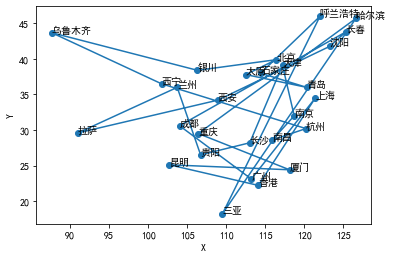

t 99.0 d 415.0130056574952
t 98.01 d 447.29294821866375
t 97.0299 d 431.4024374110395
t 96.059601 d 407.2443674750292
t 95.09900499 d 438.37179889378854
t 94.1480149401 d 358.9236635549655
t 93.206534790699 d 395.702649891136
t 92.27446944279201 d 404.1074544237425
t 91.35172474836409 d 409.0907338521914
t 90.43820750088045 d 413.38031461062457
t 89.53382542587164 d 420.7115921555203
t 88.63848717161292 d 390.83994593298377
t 87.75210229989679 d 468.7327681431866
t 86.87458127689783 d 418.43982019486015
t 86.00583546412885 d 415.49879102694985
t 85.14577710948755 d 423.15704815919776
t 84.29431933839268 d 437.9347648505486
t 83.45137614500875 d 450.33518742111903
t 82.61686238355867 d 398.2387344093349
t 81.79069375972308 d 393.6540154093073
t 80.97278682212585 d 468.79423780444625
t 80.1630589539046 d 436.33548250375173
t 79.36142836436555 d 441.0691526525474
t 78.56781408072189 d 376.0570327453193
t 77.78213593991467 d 409.9433224918942
t 77.00431458051553 d 450.0538986959612
t 76.23

t 12.87003410896553 d 320.0818787510115
t 12.741333767875876 d 323.717920925144
t 12.613920430197117 d 388.6506708399103
t 12.487781225895146 d 389.32969333242346
t 12.362903413636195 d 395.0953931023918
t 12.239274379499832 d 365.3998512142941
t 12.116881635704834 d 402.8396863910263
t 11.995712819347785 d 278.33243386797847
t 11.875755691154307 d 353.4458712548819
t 11.756998134242764 d 362.46098367748544
t 11.639428152900336 d 372.7892936066644
t 11.523033871371332 d 333.94738649826235
t 11.407803532657619 d 375.13097021377877
t 11.293725497331042 d 349.47769175358746
t 11.180788242357732 d 269.0400659667448
t 11.068980359934155 d 334.81185431510426
t 10.958290556334813 d 342.7526945984273
t 10.848707650771464 d 350.35987941351414
t 10.74022057426375 d 302.13993930540187
t 10.632818368521113 d 316.98034707781386
t 10.526490184835902 d 349.0862076257722
t 10.421225282987542 d 306.25348491937194
t 10.317013030157668 d 395.34211199225393
t 10.213842899856092 d 338.5236846942169
t 10.11

t 1.7070797554767783 d 157.30763654701877
t 1.6900089579220106 d 152.60365289740196
t 1.6731088683427904 d 164.11455467025127
t 1.6563777796593624 d 166.52115088911447
t 1.6398140018627687 d 151.45282032951113
t 1.623415861844141 d 168.13744502899473
t 1.6071817032256996 d 162.57434209430832
t 1.5911098861934427 d 158.9524553595048
t 1.5751987873315083 d 165.3727905260082
t 1.5594467994581933 d 174.2642232333337
t 1.5438523314636114 d 157.34774206464633
t 1.5284138081489753 d 162.63461882782397
t 1.5131296700674854 d 147.32734104887865
t 1.4979983733668105 d 148.55620734699005
t 1.4830183896331424 d 149.85027719799652
t 1.468188205736811 d 161.20607522671693
t 1.4535063236794428 d 145.23180357323022
t 1.4389712604426483 d 155.7067341709346
t 1.4245815478382218 d 151.61268948387573
t 1.4103357323598396 d 150.26593463343633
t 1.396232375036241 d 147.4523850131411
t 1.3822700512858788 d 158.18811015312738
t 1.36844735077302 d 160.9674518333112
t 1.3547628772652898 d 156.67831008344712
t 1

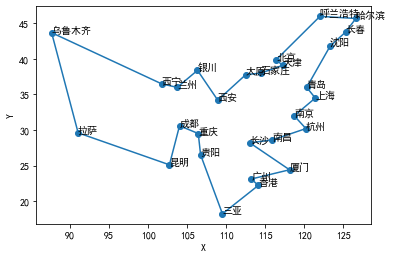

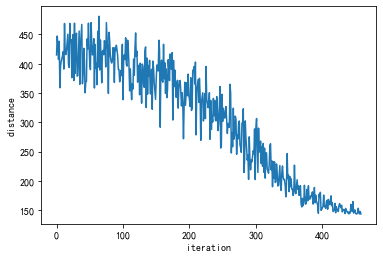

(array([ 1, 12,  5, 13, 11,  8,  4,  3, 26, 10,  6, 16, 19, 17, 18, 21,  9,
        22, 20, 15, 27,  2,  0, 23, 24, 25, 14,  7]),
 143.36626296229673)

In [1]:
import numpy as np
import math
import random
import copy
import pandas as pd
import os
# import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def draw(X,Y,L,s):
#     plt.cla()
#     fig = plt.figure()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(X, Y)
    for i in range(len(X)):
        #做标记
        plt.annotate(L[i],(X[i],Y[i]))
    X_s = []
    Y_s = []
    for i,j in enumerate(s):
        X_s.append(X[j])
        Y_s.append(Y[j])
    X_s.append(X[s[0]])
    Y_s.append(Y[s[0]])
    plt.plot(X_s, Y_s)
    #绘制散点
    plt.show()

def draw_distance(fD):
    plt.xlabel('iteration')
    plt.ylabel('distance')
    plt.plot(fD)
    plt.show()
    
def read_cities():
    df = pd.read_csv('city_location.csv',encoding = 'gb18030')
    df.columns=["city",'x','y']
    city = df["city"]
    x = df["x"]
    y = df["y"]
    cities = np.array(city)
    X = np.array(x)
    Y = np.array(y)
    n = len(X)
    return cities,X,Y,n
    
def initialize_label(n):
    L = list(range(n))
    return L

def distance_between_point(x1,x2,y1,y2):
    return math.pow(math.pow(x2-x1,2)+math.pow(y2-y1,2),1/2)

#初始化n个城市的坐标信息(二维)
def initialize_coordinate(n):
    X = 100*np.random.rand(n)
    Y = 100*np.random.rand(n)
    return X,Y

#初始化城市距离数组
#注意！这是一个对角线对称矩阵
def initialize_D(X,Y,n):
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            D[i][j] = D[j][i] = distance_between_point(X[i],X[j],Y[i],Y[j])
#     print(X)
#     print(Y)
#     print(D)
    return D

#生成新城市排列的方法（产生新的状态）
#不能随机生成，因为要保证不重复
# 网上给出的产生新的遍历路径的3种方法：
# 1. 随机选择2个节点，交换路径中的这2个节点的顺序。
# 2. 随机选择2个节点，将路径中这2个节点间的节点顺序逆转。
# 3. 随机选择3个节点m，n，k，然后将节点m与n间的节点移位到节点k后面。
def generate_state(s,n):
    #选用二变换法
    #任选序号u和v (u<v)，将u和v及其之间的顺序逆转。
#     s= np.arange(n)
    u=0
    v=0
    while(u>=v):
        u = np.random.randint(0,n)
        v = np.random.randint(0,n)
    #！！！深度拷贝
#     s_new = copy.deepcopy(s)
    s_new = s.copy()
    for i in range(int((v-u+1)/2)):
        s_new[u+i],s_new[v-i] = s_new[v-i],s_new[u+i]
        
    #换一种新的方法，只随机交换两个值
#     u = 0
#     v = 0
#     while(u!=v):
#         u = np.random.randint(0,n)
#         v = np.random.randint(0,n)
#     s_new = s.copy()
#     s_new[u],s_new[v] = s_new[v],s_new[u]
    return s_new
        
    
#计算新排列城市的距离（评价函数）
def distance_of_state(D,s):
    n = len(s)
    distance = 0
    for i in range(n):
        if(i<n-1):
            start = s[i]
            end = s[i+1]
        else:
            start = s[i]
            end = s[0]
        distance = distance + D[start][end]
    return distance

    
    
#生成初始排列（初始状态）（随机生成）
def initialize_state(n):
    s = np.random.permutation(n) 
    return s

#模拟退火算法
def SA(t=100,t_min=1,r=0.99,L=20000,n=10):
#     X,Y = initialize_coordinate(n)
#     lables = initialize_label(n)
    labels,X,Y,n = read_cities()
    D = initialize_D(X,Y,n)
    s = initialize_state(n)
    d = distance_of_state(D,s)
    draw(X,Y,labels,s)
    fD = []
    c=0
    while(t>=t_min):
        bchange = 0
        for i in range(L):
            s_new = generate_state(s,n)
            d_new = distance_of_state(D,s_new)
            ds = d_new - d
            if(ds <= 0):
                s = s_new
                d = d_new
                bchange = 1
            else:
                pro = math.exp(-ds/t)
                if(pro > np.random.rand()):
                    s = s_new 
                    d = d_new
                    bchange = 1
        fD.append(d)
        t=r*t
        print('t',t,'d',d)
#         draw(X,Y,labels,s)
        if(bchange == 0):
            c = c+1
        else:
            c = 0
        #连续2个Mapkob链中对路径无任何变动（优化或恶化的）时即停止算法运行
        if(c == 2):
            break
    draw(X,Y,labels,s)
    draw_distance(fD)
    return s,d

SA()